<a href="https://colab.research.google.com/github/joybh98/zenatix-assessment/blob/main/zenatix_data_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
#cols_plot=['date_time','AC 1','AC 2','AC 3','AC 4','AC 5','AC 6','AC 7','AC 8','AC 9','AC 10','AC 11','AC 12','AC 13','AC 14','AC 15','AC 16','AC 17','AC 18']
df=pd.read_csv('/content/drive/MyDrive/AC_Data.csv')
columns=["Time","Temp"]
temp_data=pd.read_csv('/content/drive/MyDrive/dataexport_gurgaon_final.csv', names=columns)

In [37]:
df

,0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,2019-08-01 00:00:00,7.518632,8.788315,0.000000,0.000000,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
1,2019-08-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-08-01 00:02:00,7.426114,8.940615,0.000000,0.000000,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
3,2019-08-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-08-01 00:04:00,7.052986,9.161103,0.000000,0.000000,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87835,2019-09-30 23:55:00,0.000000,6.122385,2.192198,2.083315,1.046250,0.000000,3.668421,3.006311,3.614301,1.860847,5.019769,3.154221,3.648026,2.439526,4.062719,1.854352,3.027539,7.259989
87836,2019-09-30 23:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87837,2019-09-30 23:57:00,1.209176,6.152532,2.211421,0.000000,1.448103,0.000000,3.151248,2.871690,3.417942,2.185493,5.174168,2.772349,3.786657,2.060023,4.057525,1.870886,2.991946,7.134647
87838,2019-09-30 23:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Preprocessing/Cleaning for visualizing and forecasting

In [38]:
df.rename(columns={'0':'date_time'},inplace=True)
df=df.dropna()
df['date_time']=df['date_time'].astype('datetime64[ns]')

#df['date_time']=pd.to_datetime(df['date_time'])
df.set_index('date_time', inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
# take sum of values and store it
max_vals =df[1:].sum(axis=0)

In [40]:
max_vals

AC 1      82928.526279
AC 2     134127.302289
AC 3      86767.765132
AC 4      80136.762231
AC 5      50797.952853
AC 6      93843.215508
AC 7     102022.605350
AC 8      88990.307681
AC 9     109114.281552
AC 10     53325.505899
AC 11     86124.033823
AC 12     97550.284803
AC 13    149407.931467
AC 14    102435.710397
AC 15    142862.915086
AC 16     95805.360714
AC 17    147402.533744
AC 18    223566.340098
dtype: float64

# Max Value

In [41]:
# idxmax instead of max() because if we want to use the value in a condition loop or something
max_vals.idxmax()

'AC 18'

# Min Values

In [42]:
max_vals.idxmin()

'AC 5'

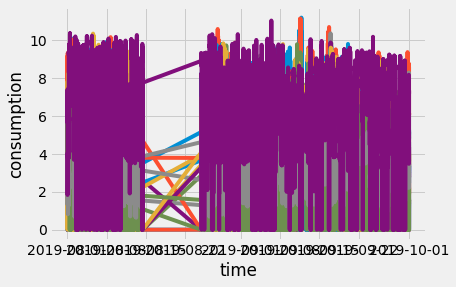

In [43]:
# plot not that clear with 18 columns but still gives idea about some values
plt.xlabel('time')
plt.ylabel('consumption')
plt.plot(df)

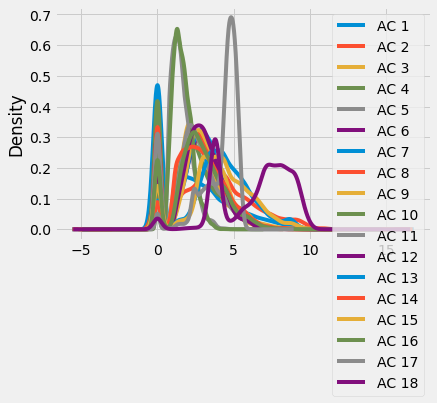

In [44]:
# density plot gives a little idea about the usage/power consumption but still crowded
df.plot(kind='density')
plt.show()

In [45]:
# resampling to compare/relate with temp data later
df=df['2019-08-01 00:00:00':'2019-09-30 23:59:00'].resample('1D').mean()

In [46]:

df.head()

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
date_time,,,,,,,,,,,,,,,,,,
2019-08-01,4.337582,7.177304,2.260919,3.298957,1.447058,2.816120,2.598578,3.265541,2.263383,1.765017,1.799540,2.523653,4.686882,3.072964,4.295824,3.633255,4.636374,7.542156
2019-08-02,3.989603,5.016976,2.903850,3.162823,1.643523,2.350510,2.339527,1.485105,2.632626,1.771287,2.012994,2.789480,5.122339,2.346786,4.479664,3.444327,4.442713,7.776494
2019-08-03,3.256437,4.292511,2.928079,1.899305,1.372382,2.554702,3.189883,1.295413,2.759224,1.463500,2.189289,3.088307,4.812202,1.866917,4.471018,2.934208,4.378729,7.867809
2019-08-04,4.187979,4.440708,2.611558,1.563769,1.552072,3.604171,2.844323,1.589539,2.546824,1.720705,1.862474,3.073666,5.000264,2.243015,4.684968,2.930669,4.553434,8.361518
2019-08-05,3.559847,4.024156,1.779394,0.909971,1.674849,3.794200,2.486408,1.644122,2.596034,1.422346,3.367481,3.125061,4.169737,2.795059,5.003871,3.461541,3.808986,6.120251


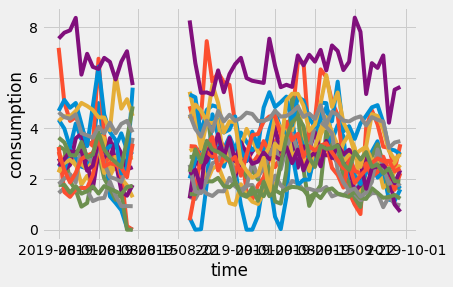

In [47]:
# plotting to check if the resampled data changes to what degree
plt.xlabel('time')
plt.ylabel('consumption')
plt.plot(df)

(-0.5, 60.5, 0.0, 8.788557929823492)

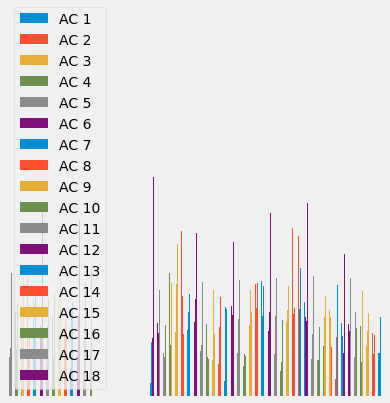

In [48]:
df.plot(kind='bar')
plt.axis('off')

In [49]:
# https://www.meteoblue.com/en/weather/archive/export/basel_switzerland_2661604?daterange=2019-08-01%20-%202019-09-30&domain=NEMSAUTO&params%5B%5D=temp2m&min=2019-08-01&max=2019-09-30&utc_offset=2&timeResolution=daily&temperatureunit=CELSIUS&velocityunit=KILOMETER_PER_HOUR&energyunit=watts&lengthunit=metric&degree_day_type=10%3B30&gddBase=10&gddLimit=30
# used this site as it gives options for hour/data etc.
temp_data
temp_data.drop(index=temp_data.index[0], 
        axis=0, 
        inplace=True)

In [50]:
temp_data

,Time,Temp
1,2019-08-01,25.520529
2,2019-08-02,26.12053
3,2019-08-03,24.88053
4,2019-08-04,27.90053
5,2019-08-05,29.89053
...,...,...
57,2019-09-26,21.520529
58,2019-09-27,22.15053
59,2019-09-28,19.82053
60,2019-09-29,25.990528


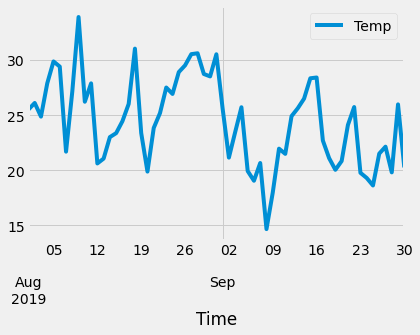

In [51]:
temp_data['Time']=temp_data['Time'].astype('datetime64[ns]')
temp_data['Temp']=temp_data['Temp'].astype('float64')
temp_plot=temp_data.set_index('Time').plot()

Text(0.5, 0, 'Time')

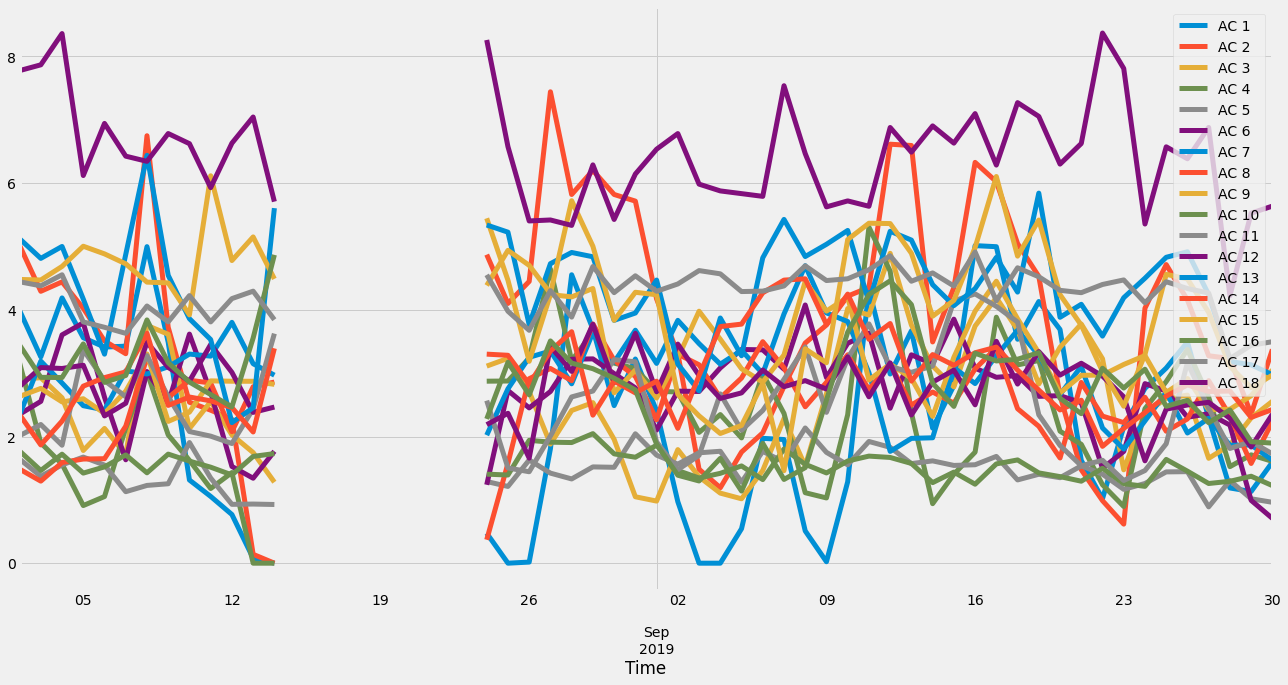

In [52]:
# for checking trend
power_consump=df[1:]
power_consump.rolling(1).mean().plot(figsize=(20,10),linewidth=5)
plt.xlabel('Time')

Text(0.5, 0, 'Time')

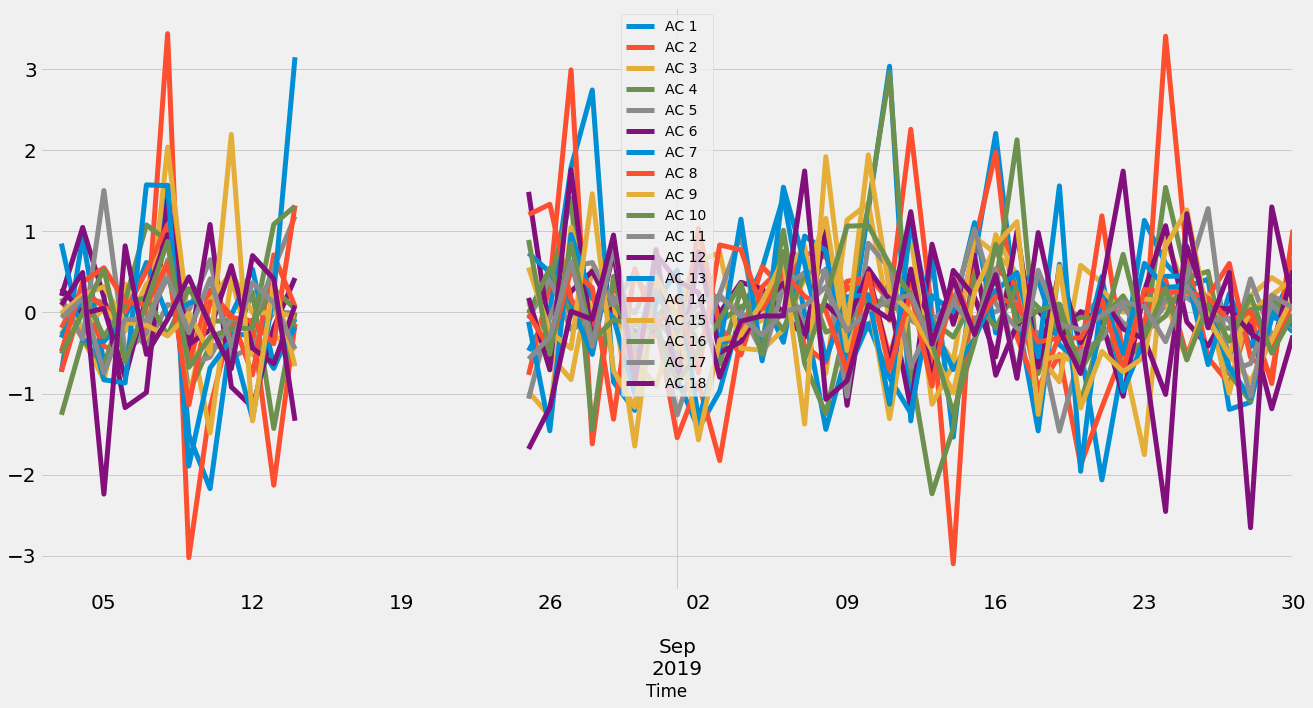

In [53]:
# check for seasonality
power_consump.diff().plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel('Time')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0112fd1950>,
      dtype=object)

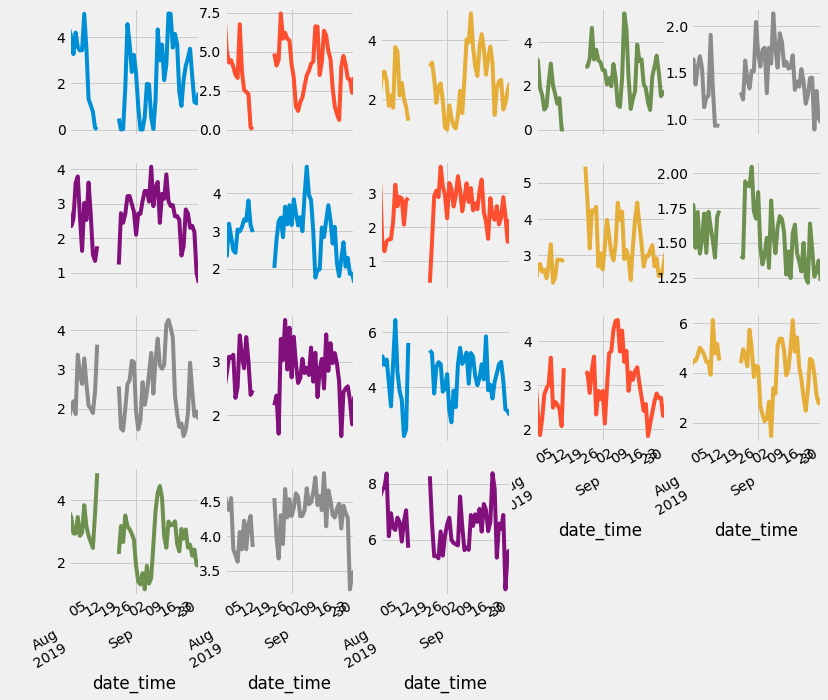

In [54]:
import numpy as np
import matplotlib.pyplot as plt
# using small figsize won't help in visualisaton
df.plot(subplots=True,layout=(4,5),figsize=(12,12),legend=False)

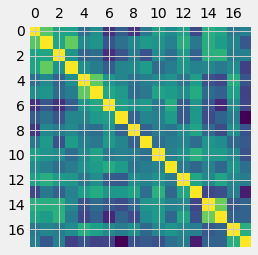

In [55]:
import matplotlib.pyplot as plt

plt.matshow(df.corr())

In [56]:
df.reset_index(inplace=True)
df.columns

Index(['date_time', 'AC 1', 'AC 2', 'AC 3', 'AC 4', 'AC 5', 'AC 6', 'AC 7',
       'AC 8', 'AC 9', 'AC 10', 'AC 11', 'AC 12', 'AC 13', 'AC 14', 'AC 15',
       'AC 16', 'AC 17', 'AC 18'],
      dtype='object')

In [57]:
!pip install prophet

# From first glance there doesn't seem to be relation between power consump and temp for AC 1

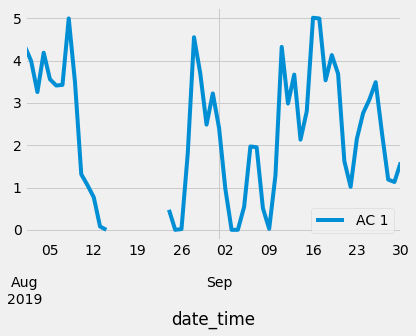

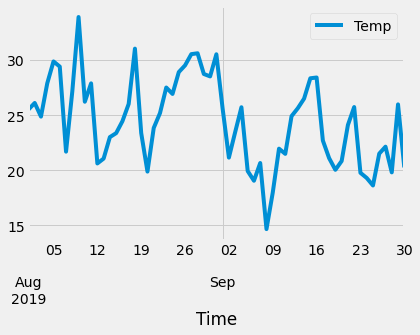

In [58]:
import matplotlib.pyplot as plt
df.plot(x="date_time", y="AC 1")
temp_data.plot(x="Time",y="Temp")

In [59]:
df_exp=df.drop(columns='date_time')
df_exp

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,4.337582,7.177304,2.260919,3.298957,1.447058,2.816120,2.598578,3.265541,2.263383,1.765017,1.799540,2.523653,4.686882,3.072964,4.295824,3.633255,4.636374,7.542156
1,3.989603,5.016976,2.903850,3.162823,1.643523,2.350510,2.339527,1.485105,2.632626,1.771287,2.012994,2.789480,5.122339,2.346786,4.479664,3.444327,4.442713,7.776494
2,3.256437,4.292511,2.928079,1.899305,1.372382,2.554702,3.189883,1.295413,2.759224,1.463500,2.189289,3.088307,4.812202,1.866917,4.471018,2.934208,4.378729,7.867809
3,4.187979,4.440708,2.611558,1.563769,1.552072,3.604171,2.844323,1.589539,2.546824,1.720705,1.862474,3.073666,5.000264,2.243015,4.684968,2.930669,4.553434,8.361518
4,3.559847,4.024156,1.779394,0.909971,1.674849,3.794200,2.486408,1.644122,2.596034,1.422346,3.367481,3.125061,4.169737,2.795059,5.003871,3.461541,3.808986,6.120251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,3.490592,4.155844,2.652966,3.373638,1.445097,2.304000,2.055185,2.277400,2.915035,1.452648,3.167195,2.497959,4.916171,2.814585,4.487704,2.571598,4.336147,6.384675
57,2.294675,3.274392,1.655617,2.620410,0.889503,2.359678,2.287638,2.882080,2.422662,1.258148,2.441874,2.539662,4.238959,2.710761,3.959076,2.218024,4.264613,6.878913
58,1.187629,3.231414,1.863808,1.524184,1.303908,2.180396,1.861190,2.326428,2.429706,1.292894,1.811321,2.286714,3.184629,2.718239,3.107385,2.419250,3.229049,4.223416
59,1.131083,2.354209,2.293806,1.710065,1.016752,0.992243,1.865774,1.574313,2.643362,1.372532,1.919364,1.834290,3.131667,2.302067,2.770978,1.917859,3.440735,5.525946


# Find correlation

In [60]:
corrlist=[]
def find_corr(i):
  col_2=temp_data['Temp']
  col_1=df[i]
  correlation=col_1.corr(col_2)
  corrlist.append(correlation)

In [61]:
for i in df_exp.columns:
  find_corr(i)

In [62]:
corrlist

[0.19423137619402087,
 0.28966662397298165,
 -0.14428390958975548,
 0.0961410348313089,
 0.05930466299591523,
 0.025181142418330034,
 0.0012386333800687788,
 -0.06153392834632569,
 0.0034639175357803783,
 0.3510640391992491,
 0.011587186828473093,
 0.16285661479232322,
 -0.16842744180120178,
 -0.24121589705292787,
 0.29736346979246236,
 0.06284184574002315,
 -0.16579446894732006,
 0.09156395312717297]

In [63]:
max(corrlist)

0.3510640391992491

In [64]:
min(corrlist)

-0.24121589705292787

In [65]:
df

,date_time,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,2019-08-01,4.337582,7.177304,2.260919,3.298957,1.447058,2.816120,2.598578,3.265541,2.263383,1.765017,1.799540,2.523653,4.686882,3.072964,4.295824,3.633255,4.636374,7.542156
1,2019-08-02,3.989603,5.016976,2.903850,3.162823,1.643523,2.350510,2.339527,1.485105,2.632626,1.771287,2.012994,2.789480,5.122339,2.346786,4.479664,3.444327,4.442713,7.776494
2,2019-08-03,3.256437,4.292511,2.928079,1.899305,1.372382,2.554702,3.189883,1.295413,2.759224,1.463500,2.189289,3.088307,4.812202,1.866917,4.471018,2.934208,4.378729,7.867809
3,2019-08-04,4.187979,4.440708,2.611558,1.563769,1.552072,3.604171,2.844323,1.589539,2.546824,1.720705,1.862474,3.073666,5.000264,2.243015,4.684968,2.930669,4.553434,8.361518
4,2019-08-05,3.559847,4.024156,1.779394,0.909971,1.674849,3.794200,2.486408,1.644122,2.596034,1.422346,3.367481,3.125061,4.169737,2.795059,5.003871,3.461541,3.808986,6.120251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2019-09-26,3.490592,4.155844,2.652966,3.373638,1.445097,2.304000,2.055185,2.277400,2.915035,1.452648,3.167195,2.497959,4.916171,2.814585,4.487704,2.571598,4.336147,6.384675
57,2019-09-27,2.294675,3.274392,1.655617,2.620410,0.889503,2.359678,2.287638,2.882080,2.422662,1.258148,2.441874,2.539662,4.238959,2.710761,3.959076,2.218024,4.264613,6.878913
58,2019-09-28,1.187629,3.231414,1.863808,1.524184,1.303908,2.180396,1.861190,2.326428,2.429706,1.292894,1.811321,2.286714,3.184629,2.718239,3.107385,2.419250,3.229049,4.223416
59,2019-09-29,1.131083,2.354209,2.293806,1.710065,1.016752,0.992243,1.865774,1.574313,2.643362,1.372532,1.919364,1.834290,3.131667,2.302067,2.770978,1.917859,3.440735,5.525946


In [79]:
from prophet import Prophet
results=[]
cols=['AC 1','AC 2','AC 3','AC 4','AC 5','AC 6','AC 7','AC 8','AC 9','AC 10','AC 11','AC 12','AC 13','AC 14','AC 15','AC 16','AC 17','AC 18']
for col in cols:
  subdf = df[['date_time', col]].dropna()
  subdf = subdf.rename(columns={'date_time':'ds', col:'y'})
  m=Prophet()
  m.fit(subdf)
  result_df=m.predict(m.make_future_dataframe(periods=90))
  result_df.set_index(result['ds'])
  result_df = result[['yhat']]
  results.append(result_df)
forecast=pd.concat(results,axis=1)
for col in cols:
  forecast=forecast.rename(columns={'yhat':col})

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to overr

In [75]:
final_df_final

,AC 1,AC 1,AC 1,AC 1,AC 1,AC 1,AC 1,AC 1,AC 1,AC 1,AC 1,AC 1,AC 1,AC 1,AC 1,AC 1,AC 1,AC 1
0,3.610996,3.610996,3.610996,3.610996,3.610996,3.610996,3.610996,3.610996,3.610996,3.610996,3.610996,3.610996,3.610996,3.610996,3.610996,3.610996,3.610996,3.610996
1,3.240182,3.240182,3.240182,3.240182,3.240182,3.240182,3.240182,3.240182,3.240182,3.240182,3.240182,3.240182,3.240182,3.240182,3.240182,3.240182,3.240182,3.240182
2,2.045263,2.045263,2.045263,2.045263,2.045263,2.045263,2.045263,2.045263,2.045263,2.045263,2.045263,2.045263,2.045263,2.045263,2.045263,2.045263,2.045263,2.045263
3,1.788786,1.788786,1.788786,1.788786,1.788786,1.788786,1.788786,1.788786,1.788786,1.788786,1.788786,1.788786,1.788786,1.788786,1.788786,1.788786,1.788786,1.788786
4,1.912533,1.912533,1.912533,1.912533,1.912533,1.912533,1.912533,1.912533,1.912533,1.912533,1.912533,1.912533,1.912533,1.912533,1.912533,1.912533,1.912533,1.912533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,2.113868,2.113868,2.113868,2.113868,2.113868,2.113868,2.113868,2.113868,2.113868,2.113868,2.113868,2.113868,2.113868,2.113868,2.113868,2.113868,2.113868,2.113868
138,2.855240,2.855240,2.855240,2.855240,2.855240,2.855240,2.855240,2.855240,2.855240,2.855240,2.855240,2.855240,2.855240,2.855240,2.855240,2.855240,2.855240,2.855240
139,2.484427,2.484427,2.484427,2.484427,2.484427,2.484427,2.484427,2.484427,2.484427,2.484427,2.484427,2.484427,2.484427,2.484427,2.484427,2.484427,2.484427,2.484427
140,1.289507,1.289507,1.289507,1.289507,1.289507,1.289507,1.289507,1.289507,1.289507,1.289507,1.289507,1.289507,1.289507,1.289507,1.289507,1.289507,1.289507,1.289507


<Figure size 880x320 with 0 Axes>

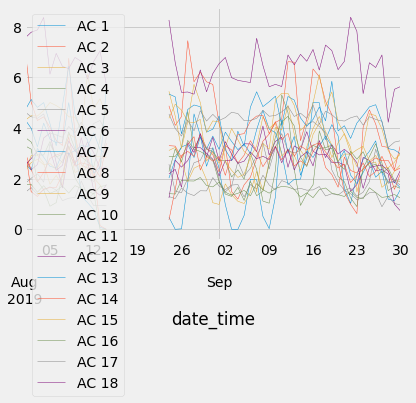

In [76]:
#check for seasonality
plt.figure(figsize=(11,4), dpi= 80)
df.set_index('date_time').plot(linewidth = 0.5)

In [ ]:
#df.set_index('date_time').mean().plot(kind='bar')

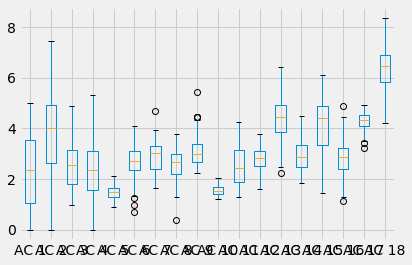

In [71]:
df.plot(kind='box')

## Cyclic Pattern Recoginized
## No seasonality recoginzed
## Data is non-linear
## Weak correlation between temperature and power consumption

# Patterns
1. We can see that from 2019-08-15 to 2019-09-01, there is a very little use of AC's
2. In some units, as the day progresses, the power consumption increases, this can mean that it's been on for a long time, or later in the day people use it more.